# 2. Problem Statement

In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.

In [9]:
#Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [10]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Visualizing Target Variables

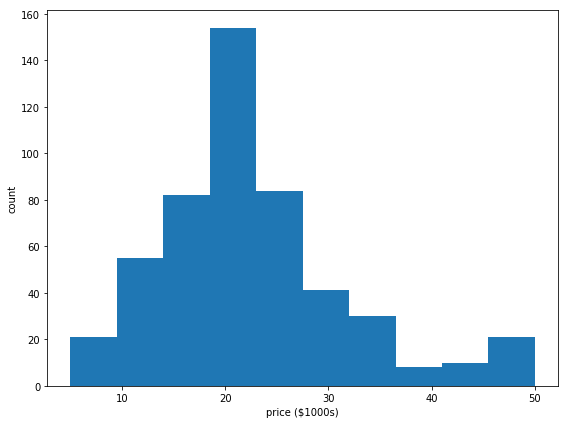

In [13]:
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.hist(targets)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

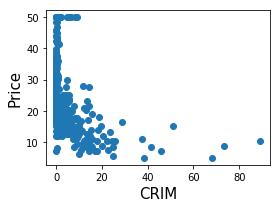

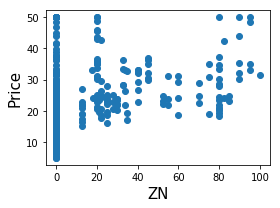

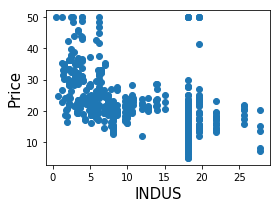

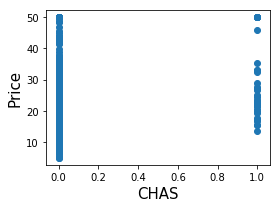

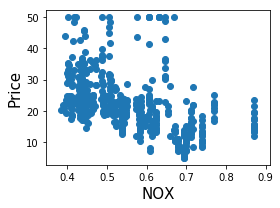

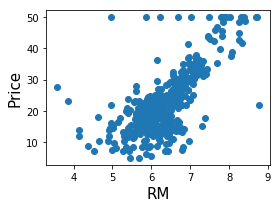

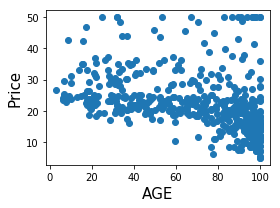

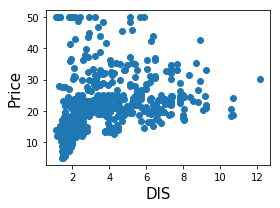

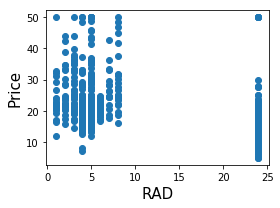

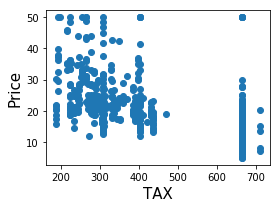

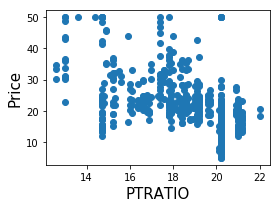

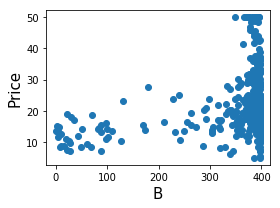

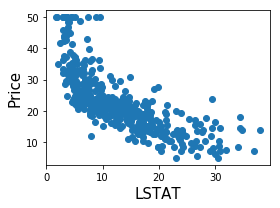

In [17]:
# Pirnt the scatter plot for each feature with respect to price
feature_names = features.columns
X = features.values
for index, feature_name in enumerate(features.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, index], targets)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# Split the data into trainning set and test set

In [18]:
X =features.values
Y =targets

In [19]:
Y=Y.reshape(-1,1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.7,random_state =34)

In [31]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_train Shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

X_train Shape :  (151, 13)
X_test Shape :  (355, 13)
y_train Shape :  (151, 1)
y_test.shape :  (355, 1)


In [29]:
X_train

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.43200e-02, 1.00000e+02, 1.32000e+00, ..., 1.51000e+01,
        3.92900e+02, 3.95000e+00],
       [3.61500e-02, 8.00000e+01, 4.95000e+00, ..., 1.92000e+01,
        3.96900e+02, 4.70000e+00],
       ...,
       [8.71675e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.91980e+02, 1.71200e+01],
       [5.82401e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.07400e+01],
       [7.02200e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.93230e+02, 1.01100e+01]])

# Importance score of features used in RandomForest Regressor

In [75]:
randon_forest =RandomForestRegressor(n_estimators=508,random_state=1,bootstrap =True)
randon_forest.fit(X,Y)

C:\Users\312006926\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=508, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [76]:
print("Features sorted by their score of importance:")
print(sorted(zip(map(lambda x: round(x, 4), randon_forest.feature_importances_), features.columns),reverse=True))


Features sorted by their score of importance:
[(0.429, 'RM'), (0.3758, 'LSTAT'), (0.0683, 'DIS'), (0.0344, 'CRIM'), (0.0242, 'NOX'), (0.0172, 'PTRATIO'), (0.0146, 'TAX'), (0.0141, 'AGE'), (0.0117, 'B'), (0.006, 'INDUS'), (0.003, 'RAD'), (0.001, 'ZN'), (0.0009, 'CHAS')]


In [77]:
randon_forest.score(X_train,y_train)

0.9825395122584676

In [78]:
randon_forest.score(X_test,y_test)

0.9837365002383915

In [86]:
Y_Predict=randon_forest.predict(X_train)
Y_PredictTest=randon_forest.predict(X_test)

In [87]:
print("Error Rate of the Regression Model random forest : ",mean_squared_error(Y_PredictTest,y_test))

Error Rate of the Regression Model random forest :  1.4886580522879298


In [88]:
print("R2 Score of the Regression Model random forest : ",r2_score(Y_PredictTest,y_test))

R2 Score of the Regression Model random forest :  0.9820869523808572


In [89]:
lr = LinearRegression()
lr.fit(X, Y)
print("Features sorted by their score:")


Y_pred_lr = lr.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(Y_pred_lr,y_test))
print("R2 Score of theY_PredictTest Regression Model rf : ",r2_score(Y_pred_lr,y_test))

Features sorted by their score:
Error Rate of the Regression Model rf :  23.52459564204752
R2 Score of the Regression Model rf :  0.6473415754080148


The accuracy score of is 98% as while that of is 64% Hence the performs better on the Boston Housing Dataset in predicting future prices.

# Data Visualization

Text(0.5,1,'Prices vs Predicted prices')

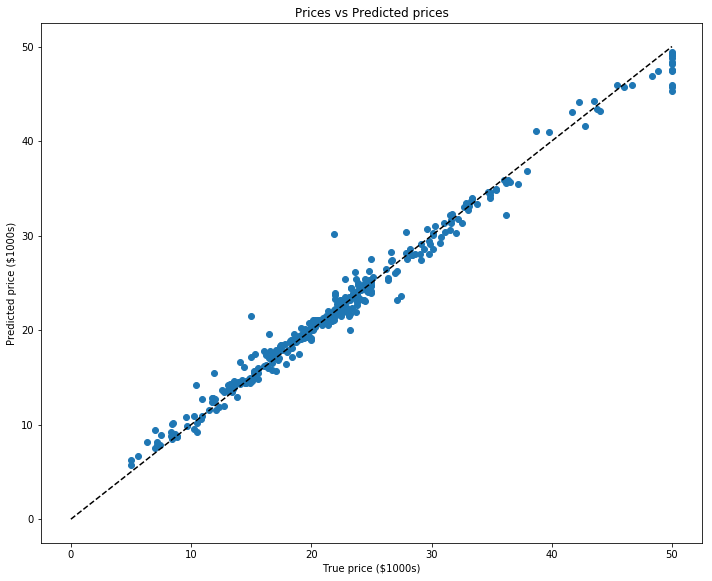

In [93]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, Y_PredictTest)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

Text(0.5,1,'Prices vs Predicted prices')

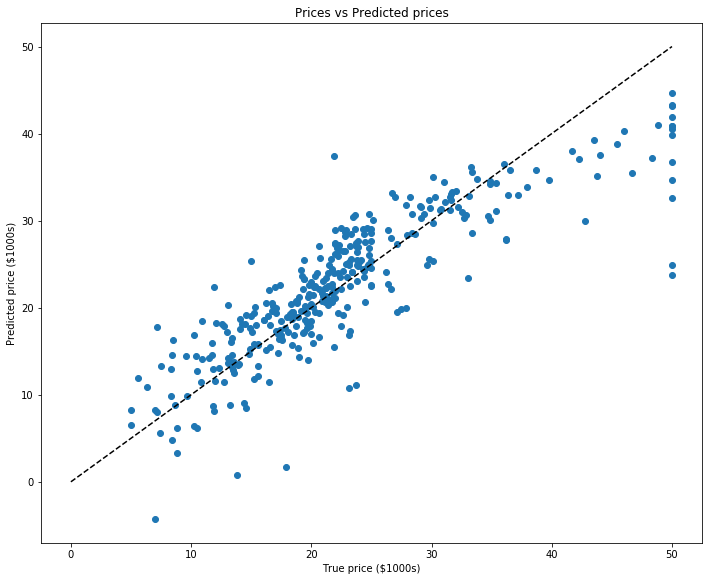

In [94]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, Y_pred_lr)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Using Bagging Mechanism to check the score of with different parameters

In [108]:
randon_forest1 =RandomForestRegressor(random_state=1,max_features=13)
randon_forest1.fit(X,Y)
randon_forest1.score(X_train,y_train)
Y_PredictTest1=randon_forest1.predict(X_test)
print("Error Rate of the Regression Model random forest : ",mean_squared_error(Y_PredictTest1,y_test))
print("R2 Score of the Regression Model random forest : ",r2_score(Y_PredictTest1,y_test))

Error Rate of the Regression Model random forest :  2.1481785915492964
R2 Score of the Regression Model random forest :  0.9740447532506137


C:\Users\312006926\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [111]:
randon_forest2 =RandomForestRegressor(random_state=1,max_features=3)
randon_forest2.fit(X,Y)
randon_forest2.score(X_train,y_train)
Y_PredictTest2=randon_forest2.predict(X_test)
print("Error Rate of the Regression Model random forest : ",mean_squared_error(Y_PredictTest2,y_test))
print("R2 Score of the Regression Model random forest : ",r2_score(Y_PredictTest2,y_test))

Error Rate of the Regression Model random forest :  2.63862985915493
R2 Score of the Regression Model random forest :  0.9669848275857897


C:\Users\312006926\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [112]:
df_corr = features.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

['NOX', 'DIS', 'TAX']


In [113]:
X1 = features.drop(['DIS', 'TAX'],axis=1)#eliminating two and keeping one features
Y1 = targets
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size =0.3,random_state=101)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)
rf4 = RandomForestRegressor()
rf4.fit(X_test, Y_test)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf4.feature_importances_), X1.columns),reverse=True))

X_train Shape :  (354, 11)
X_test Shape :  (152, 11)
Y_train Shape :  (354,)
Y_test.shape :  (152,)
Features sorted by their score:
[(0.6053, 'RM'), (0.2474, 'LSTAT'), (0.0452, 'CRIM'), (0.0333, 'AGE'), (0.0226, 'B'), (0.0173, 'NOX'), (0.0126, 'PTRATIO'), (0.0076, 'CHAS'), (0.0045, 'RAD'), (0.0035, 'INDUS'), (0.0008, 'ZN')]


In [114]:
Y_pred4 = rf4.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(Y_pred4,Y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(Y_pred4,Y_test))

Error Rate of the Regression Model rfc3 :  4.113997368421052
R2 Score of the Regression Model rfc3 :  0.9523510562656528
